# Working with Classification Trees in Python

## Learning Objectives
Decision Trees are one of the most popular approaches to supervised machine learning. Decison Trees use an inverted tree-like structure to model the relationship between independent variables and a dependent variable. A tree with a categorical dependent variable is known as a **Classification Tree**. By the end of this tutorial, you will have learned:

+ How to import, explore and prepare data
+ How to build a Classification Tree model
+ How to visualize the structure of a Classification Tree
+ How to Prune a Classification Tree 

## 1. Collect the Data

In [3]:
import pandas as pd

loan = pd.read_csv("loan.csv")
loan.head()

,Income,Loan Amount,Default
0,15,8,No
1,30,8,No
2,5,9,Yes
3,22,10,No
4,33,12,No


## 2. Explore the Data

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Income       30 non-null     int64 
 1   Loan Amount  30 non-null     int64 
 2   Default      30 non-null     object
dtypes: int64(2), object(1)
memory usage: 852.0+ bytes


In [5]:
loan.describe()

,Income,Loan Amount
count,30.000000,30.000000
mean,18.766667,51.966667
std,8.572946,34.055212
min,5.000000,8.000000
25%,13.000000,21.250000
50%,18.000000,49.000000
75%,25.500000,79.500000
max,34.000000,110.000000


In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

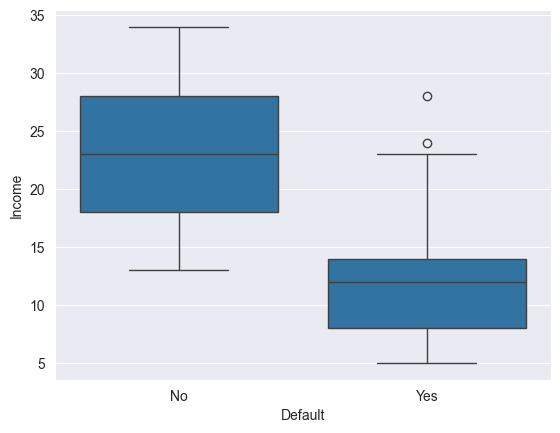

In [7]:
ax = sns.boxplot(data=loan, x='Default', y='Income')

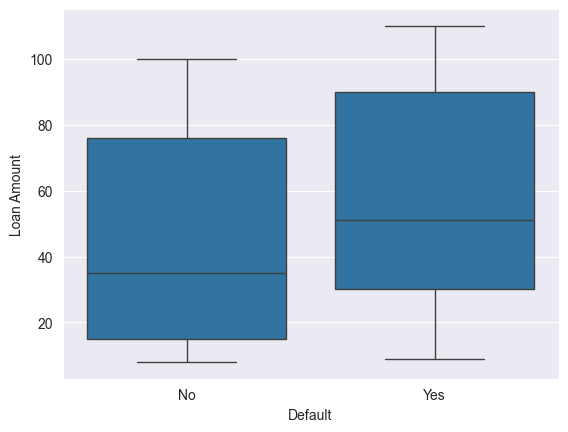

In [8]:
ax = sns.boxplot(data=loan, x='Default', y='Loan Amount')

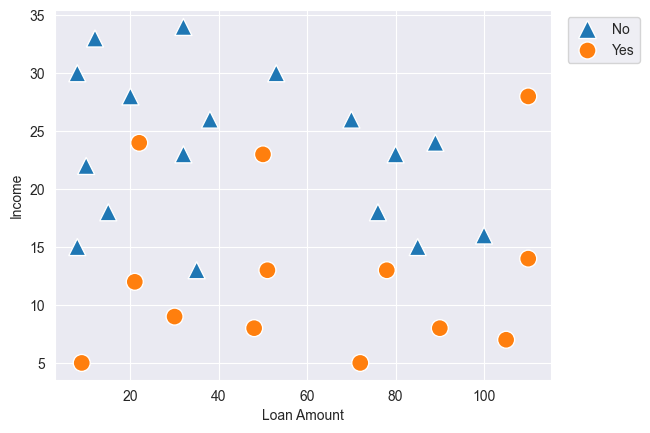

In [9]:
ax = sns.scatterplot(data=loan,
                     x='Loan Amount',
                     y='Income',
                     hue='Default',
                     style='Default',
                     markers=['^', 'o'],
                     s=150)
ax = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

## 3. Prepare the Data

In [10]:
y = loan[['Default']]

In [11]:
X = loan[['Income', 'Loan Amount']]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    # 80% of the data is taken as training data and 20% as test data
                                                    stratify=y,
                                                    # Use stratified random sampling based on the values of y
                                                    random_state=1234)  # To get the same result everytime we do the split

In [13]:
X_train.shape, X_test.shape  # Check the number of instances in the training set and test set

((24, 2), (6, 2))

## 4. Train and Evaluate the Classification Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(random_state=1234)

In [15]:
model = classifier.fit(X_train, y_train)  # build a classification tree model that fits the training data

In [16]:
model.score(X_test, y_test)  # Returns the accuracy of the model against test data

0.5

## 5. Visualize the Classification Tree

Here the idea is to get a better understanding of the tree logic

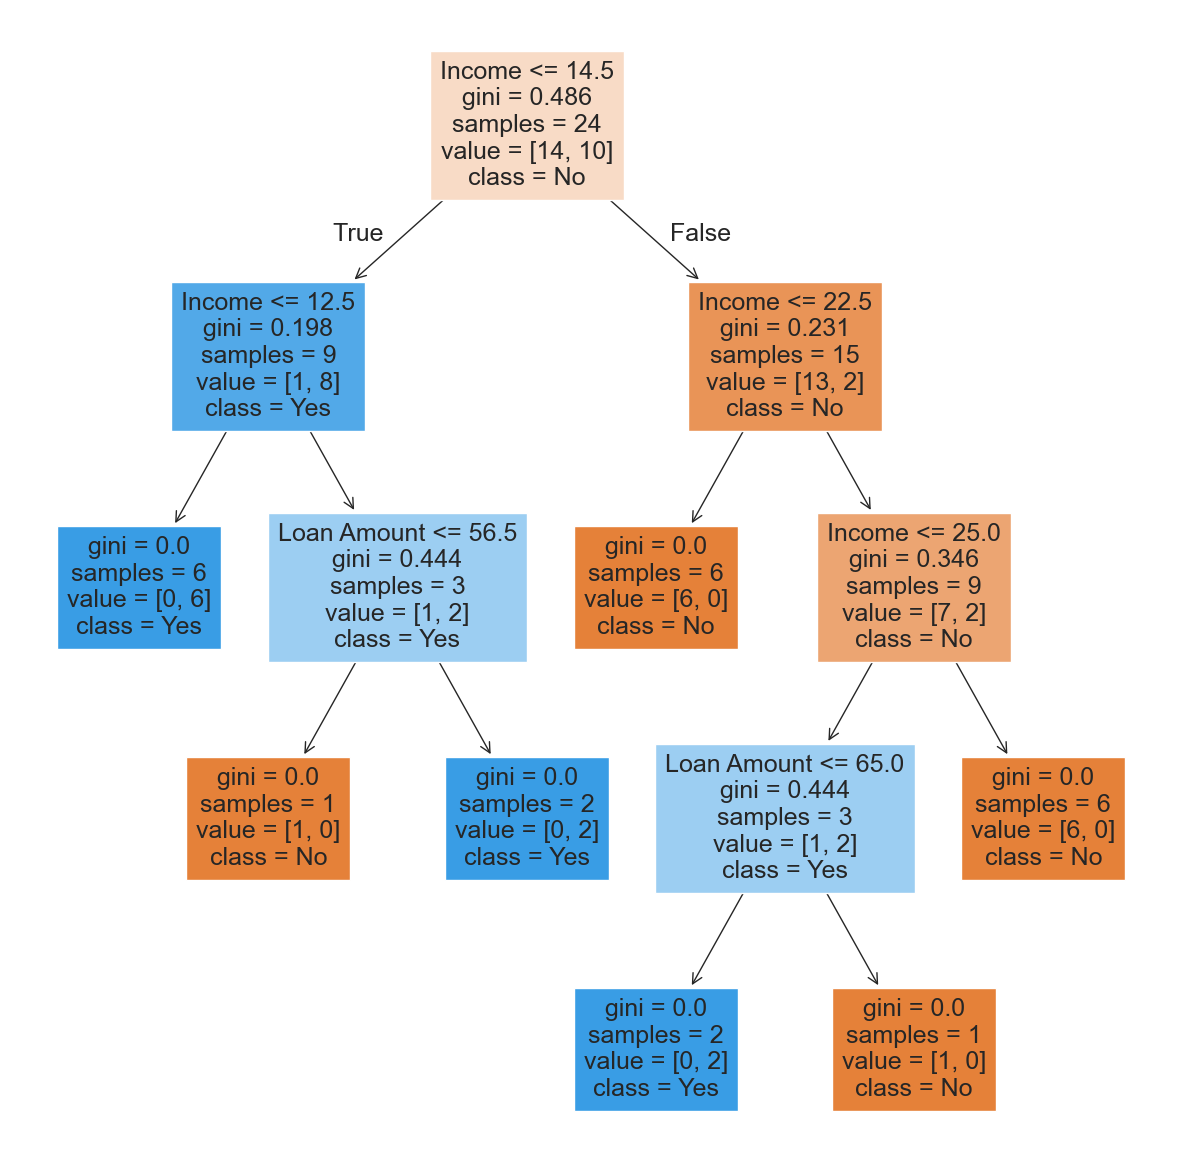

In [18]:
from sklearn import tree

plt.figure(figsize=(15, 15))  # specifies the size of our tree figure
tree.plot_tree(model, feature_names=list(X_train.columns), class_names=['No', 'Yes'], filled=True);

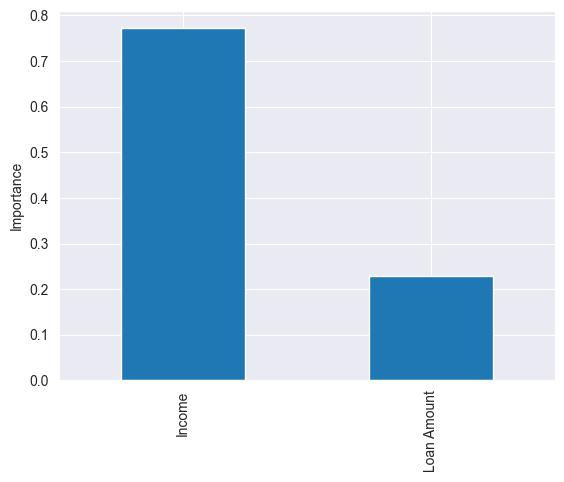

In [19]:
importance = model.feature_importances_
feature_importance = pd.Series(importance, index=X.columns)
feature_importance.plot(kind='bar')
plt.ylabel('Importance');

## 6. Prune the Classification Tree

Here the idea is to prune the classification tree, in order to improve it's performance

In [20]:
model.score(X_train,
            y_train)  # If the score is 1 then that means it's 100% accurate on training data, which is suspicious

1.0

In [21]:
model.score(X_test,
            y_test)  # Here we could see that model has 50% accuracy on test data. Which means that the model overfits the training data and needs to be pruned 

0.5

There are 2 ways to prune a decision tree. 
* Pre-Pruning : One is to set parameters that manage it's growth during the recursive partitioning process.
* Post-Pruning : Another approach is to allow the tree to fully grow unimpeded and then gradually reduce it's size to improve performance.  

In this tutorial we'll be using pre-pruning. Means that we need to figure out the best combination of values for the parameters of tree that results in the best performance. This is known as hyper-parameter tuning. Sci-Kit learn provides several parameters that we could use to tune during this process. 

Following are some of the parameters we are going to use
* max_depth : Sets the maximum depth of the decision tree
* min_samples_split : Sets the minimum number of partitions we could have before it's split
* min_samples_leaf : Sets the minimum number of items we have in the leaf node

In [22]:
grid = {'max_depth': [2, 3, 4, 5], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2, 3, 4, 5,
                                                                                        6]}  # Here we define a dictionary of parameters from Sci-Kit learn to try out. 

In [24]:
from sklearn.model_selection import GridSearchCV

classifier = DecisionTreeClassifier(random_state=1234)
gcv = GridSearchCV(estimator=classifier, param_grid=grid)  # Allows to find the best parameter combination for our tree
gcv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4]})

In [25]:
model_ = gcv.best_estimator_
model_.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=6, random_state=1234)

In [26]:
model_.score(X_train, y_train)

0.875

In [27]:
model_.score(X_test, y_test)

0.8333333333333334

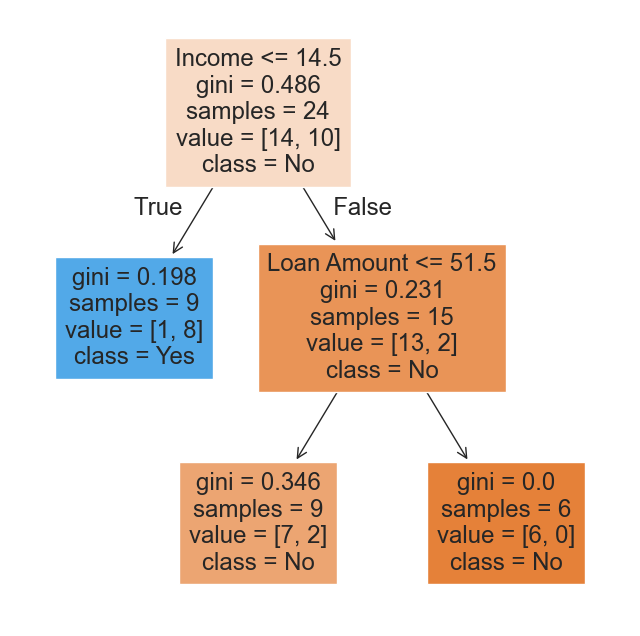

In [28]:
plt.figure(figsize=(8, 8))
tree.plot_tree(model_,
               feature_names=list(X.columns),
               class_names=['No', 'Yes'],
               filled=True);